In [8]:
import pandas as pd

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [11]:
python.exe -m install --upgrade pip

SyntaxError: invalid syntax (2612237378.py, line 1)

In [32]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd

In [3]:
import requests
import pandas as pd

def get_historic_price(symbol, after='2018-09-01'):
    url = 'https://api.kraken.com/0/public/OHLC'

    # Kraken uses XBT instead of BTC
    symbol = 'XBT' if symbol.upper() == 'BTC' else symbol.upper()
    pair = f"{symbol}GBP"

    resp = requests.get(url, params={
        "pair": pair,
        "interval": 60,
        "since": str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()

    if data.get("error"):
        raise ValueError(f"API returned error: {data['error']}")

    result_key = [k for k in data['result'].keys() if k != 'last'][0]

    results = [
        (close_time, float(open_), float(high), float(low), float(close), float(volume))
        for (close_time, open_, high, low, close, vwap, volume, count)
        in data['result'][result_key]
    ]

    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    
    return df


In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2025-05-29 18:42:43.264903')

In [5]:
btc = get_historic_price('btc', after=last_week)

In [6]:
eth = get_historic_price('eth', after=last_week)

In [7]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-05-29 19:00:00,78500.1,78600.6,78350.0,78400.0,5.037204
2025-05-29 20:00:00,78530.0,78697.6,78515.4,78670.0,2.796859
2025-05-29 21:00:00,78670.0,78963.0,78666.4,78929.5,3.228508
2025-05-29 22:00:00,78949.5,78949.5,78574.2,78574.2,0.600633
2025-05-29 23:00:00,78574.2,78630.3,78163.7,78266.1,1.279937


In [8]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167 entries, 2025-05-29 19:00:00 to 2025-06-05 17:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   167 non-null    float64
 1   HighPrice   167 non-null    float64
 2   LowPrice    167 non-null    float64
 3   ClosePrice  167 non-null    float64
 4   Volume      167 non-null    float64
dtypes: float64(5)
memory usage: 7.8 KB


<Axes: xlabel='CloseTime'>

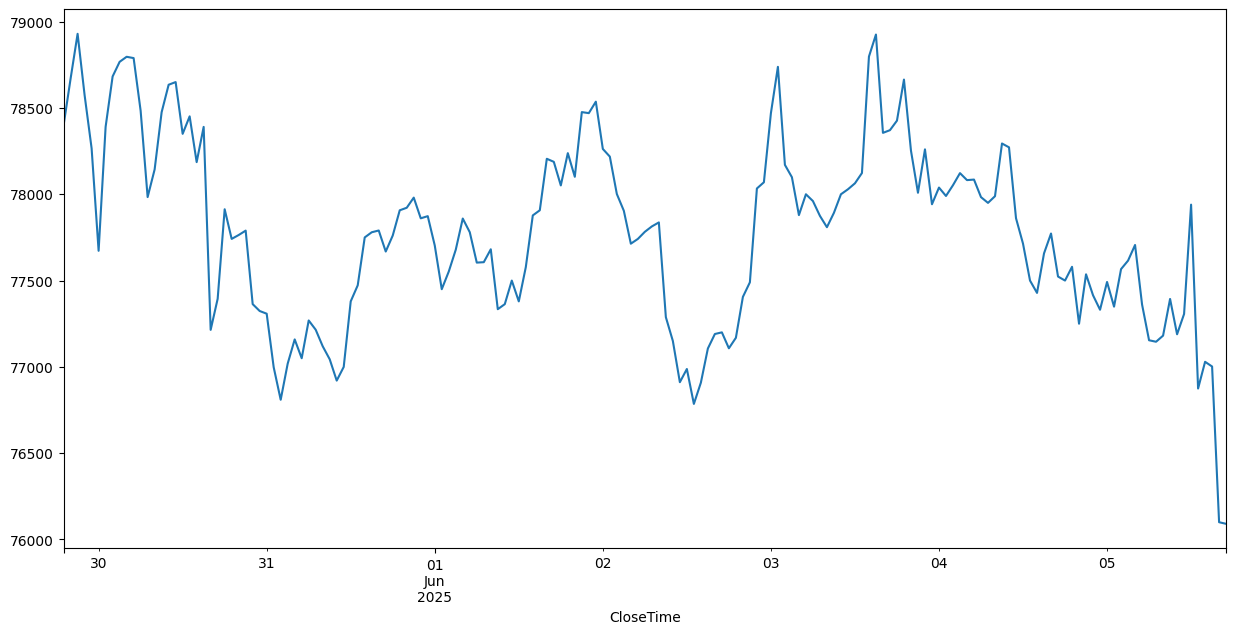

In [9]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [10]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-05-29 19:00:00,1965.77,1968.50,1947.98,1965.40,22.224279
2025-05-29 20:00:00,1967.27,1971.05,1959.00,1960.59,24.313252
2025-05-29 21:00:00,1960.75,1969.56,1960.48,1969.55,17.355085
2025-05-29 22:00:00,1971.92,1978.14,1959.64,1959.64,5.571739
2025-05-29 23:00:00,1961.08,1963.73,1944.55,1950.12,22.543750


<Axes: xlabel='CloseTime'>

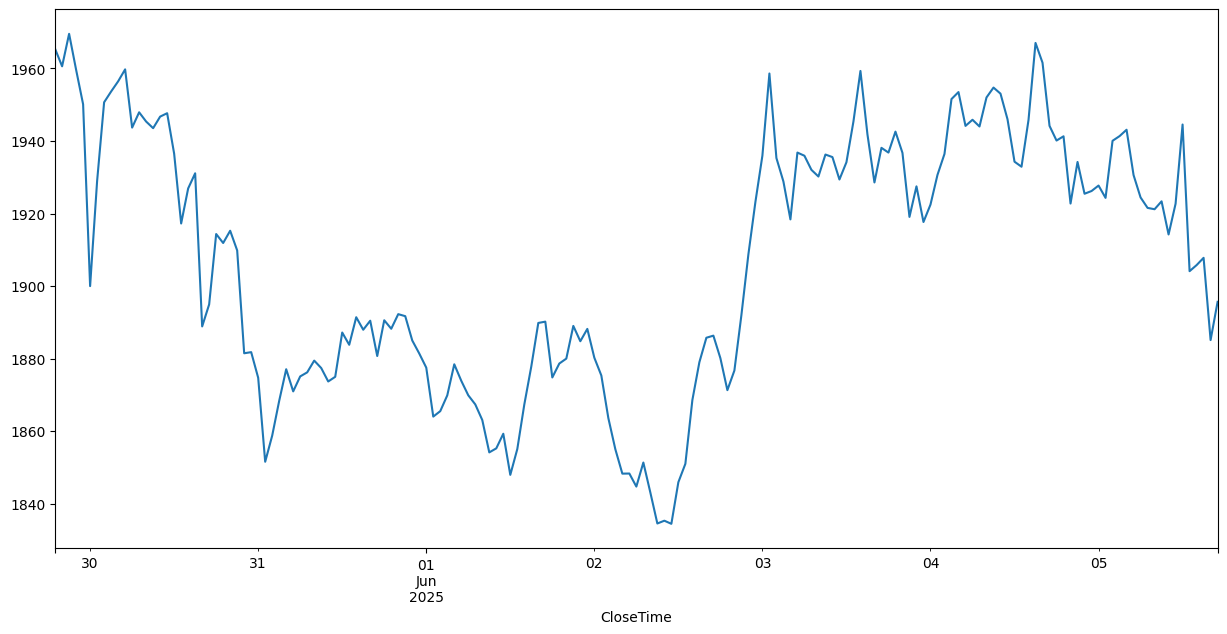

In [11]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [12]:
pip install Bokeh

Note: you may need to restart the kernel to use updated packages.


In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [14]:
output_notebook()

Loading BokehJS ...

In [15]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()  # Optional, use if running inside Jupyter

p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800, height=400)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price (GBP)'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')

p1.legend.location = "top_left"
p1.legend.click_policy = "hide"  # Optional: lets user toggle legend entries

show(p1)


Loading BokehJS ...

In [16]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd

# Example: Exporting the `btc` DataFrame to an Excel file
with pd.ExcelWriter('cryptos.xlsx', engine='xlsxwriter') as writer:
    btc.to_excel(writer, sheet_name='Bitcoin')

In [25]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [26]:
writer.save()

AttributeError: 'XlsxWriter' object has no attribute 'save'